# BigData_SistemasRecomendacion_eq13

**Tecnológico de Monterrey**
**Maestría en Inteligencia Artificial Aplicada (MNA)**

**Materia: Big Data**

## Proyecto de Big Data sobre Sistemas de Recomendación. 

Miembros del equipo: 

Hansel Zapiain Rodriguez (A00469031)

Miguel Guillermo Galindo Orozco (A01793695) 

Francisco José Arellano Montes (A01794283)


# Avance de proyecto 1: Sistema de Recomendación 

# Importar Librerías 

In [86]:
from datasets import load_dataset
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from scipy.sparse import csr_matrix
#import sklearn
from sklearn.neighbors import NearestNeighbors

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [88]:
dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_All_Beauty", trust_remote_code=True)
print(dataset["full"][0])


{'rating': 5.0, 'title': 'Such a lovely scent but not overpowering.', 'text': "This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, medium thickness. I am comparing to other brands with yucky chemicals so I'm gonna stick with this. Try it!", 'images': [], 'asin': 'B00YQ6X8EO', 'parent_asin': 'B00YQ6X8EO', 'user_id': 'AGKHLEW2SOWHNMFQIJGBECAF7INQ', 'timestamp': 1588687728923, 'helpful_vote': 0, 'verified_purchase': True}


In [89]:
dataset

DatasetDict({
    full: Dataset({
        features: ['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase'],
        num_rows: 701528
    })
})

In [90]:
type(dataset)

datasets.dataset_dict.DatasetDict

In [91]:
#dataset["full"][0:10]

In [92]:
df = pd.DataFrame.from_dict(dataset["full"])

In [93]:
for i in df.columns:
    print(i)

rating
title
text
images
asin
parent_asin
user_id
timestamp
helpful_vote
verified_purchase


In [94]:
df = df[['asin','parent_asin','user_id','rating','helpful_vote','verified_purchase']]
df.head(10)

,asin,parent_asin,user_id,rating,helpful_vote,verified_purchase
0,B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,5.0,0,True
1,B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,4.0,1,True
2,B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,5.0,2,True
3,B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1.0,0,True
4,B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,5.0,0,True
5,B00R8DXL44,B00R8DXL44,AGMJ3EMDVL6OWBJF7CA5RGJLXN5A,4.0,0,True
6,B099DRHW5V,B099DRHW5V,AHREXOGQPZDA6354MHH4ETSF3MCQ,5.0,0,True
7,B088SZDGXG,B08BBQ29N5,AEYORY2AVPMCPDV57CE337YU5LXA,3.0,0,True
8,B08P2DZB4X,B08P2DZB4X,AFSKPY37N3C43SOI5IEXEK5JSIYA,5.0,0,False
9,B086QY6T7N,B086QY6T7N,AFSKPY37N3C43SOI5IEXEK5JSIYA,5.0,0,False


# EDA

In [95]:
print("El Data Set a estudiar cuenta con " + str(len(df)) + " registros de rating de productos adquiridos en Amazon")

El Data Set a estudiar cuenta con 701528 registros de rating de productos adquiridos en Amazon


In [96]:
#df['parent_asin'].nunique()
print("Son " + str(df['parent_asin'].nunique()) + " productos distintos (parent_asin)")

Son 112565 productos distintos (parent_asin)


In [97]:
print("De  " + str(df['user_id'].nunique()) + " usuarios distintos que dejaron su evaluación")

De  631986 usuarios distintos que dejaron su evaluación


Veamos los productos que más veces fue evaludado (con más reseñas) 

In [98]:
df.groupby('parent_asin')['rating'].count().sort_values(ascending=False).head(10)

parent_asin
B085BB7B1M    1962
B0BM4GX6TT    1750
B07C533XCW    1513
B09X9BG4FC    1374
B00R1TAN7I    1372
B08L5KN7X4    1343
B019GBG0IE    1328
B01M1OFZOG    1243
B0C9CWKY9G    1153
B0107QYW14    1112
Name: rating, dtype: int64

Observamos ahora cuál es el rating promedio de los productos con más evaluaciones

In [99]:
ratings = pd.DataFrame(df.groupby('parent_asin')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(df.groupby('parent_asin')['rating'].count())
#ratings.head()
ratings.sort_values(by='num of ratings', ascending=False).head(100)

,rating,num of ratings
parent_asin,,
B085BB7B1M,4.620285,1962
B0BM4GX6TT,4.135429,1750
B07C533XCW,4.468605,1513
B09X9BG4FC,4.496361,1374
B00R1TAN7I,4.033528,1372
...,...,...
B07K1DRCYR,4.098802,334
B00BN9PFUW,4.110092,327
B01LAV3O6E,3.374233,326


Cuántos productos existen con más de 300 evaluaciones

In [100]:
print("Existen  " + str(len(ratings[ratings['num of ratings']>300])) + " productos con al menos 300 evaluaciones")


Existen  124 productos con al menos 300 evaluaciones


¿Cuántos productos se tienen por número de evaluaciones (al menos 300)?

<Axes: >

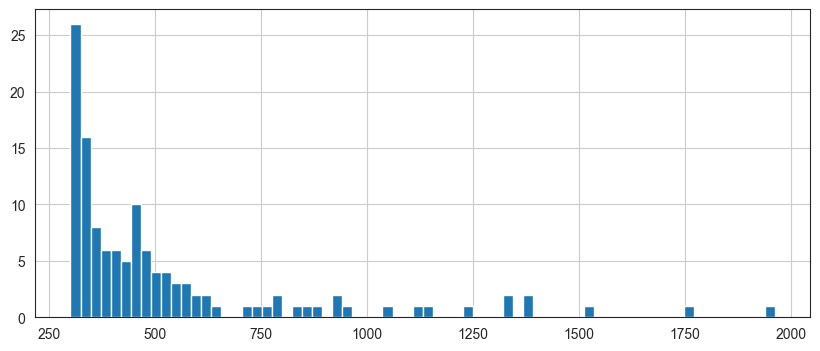

In [101]:
plt.figure(figsize=(10,4))
ratings[ratings['num of ratings']>300]['num of ratings'].hist(bins=70)

De lo anterior observamos que los productos entre 300 y 500 evaluaciones se concentran en 5 o 25 productos distintos

La distribución de los ratings observados se ve de la siguiente forma

<Axes: >

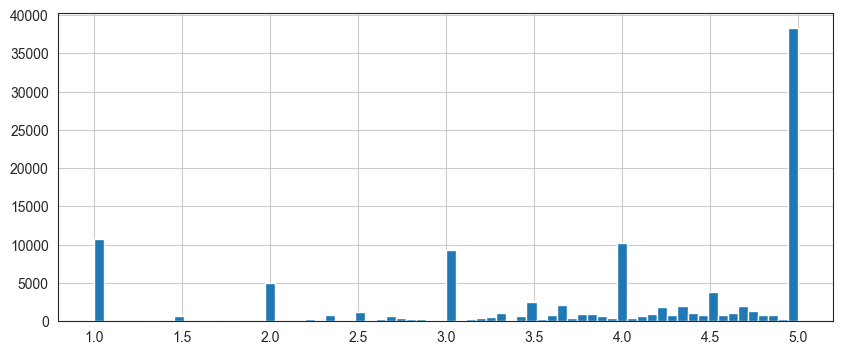

In [102]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

y para aquellos que tienen más de 300 evaluaciones se ve así: 

<Axes: >

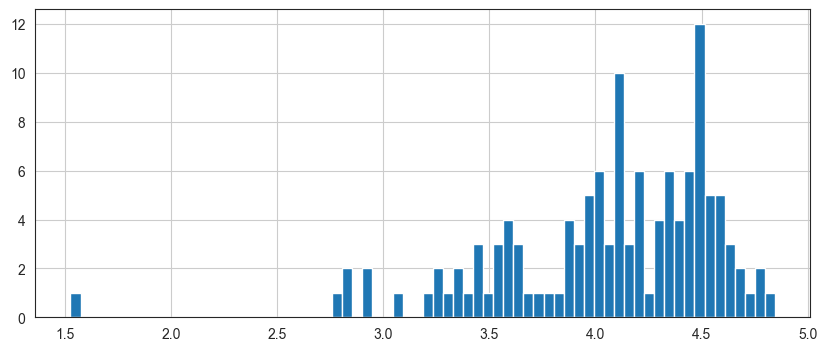

In [103]:
plt.figure(figsize=(10,4))
ratings[ratings['num of ratings']>300]['rating'].hist(bins=70)

Se observa que en general la mayoría de los productos con más de 300 evaluaciones tienen ratings por arriba de 3 / 3.5 de calificacación

Y para los que tienen menos de 300 evaluaciones se ve así: 

<Axes: >

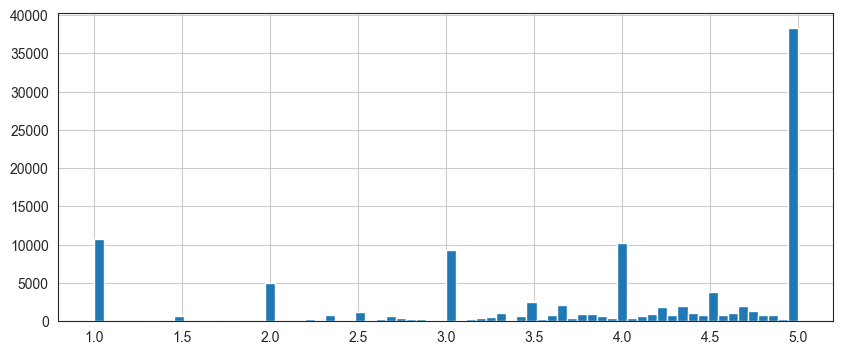

In [104]:
plt.figure(figsize=(10,4))
ratings[ratings['num of ratings']<300]['rating'].hist(bins=70)

Una distribución menos sesgada y concentrada en valores enteros

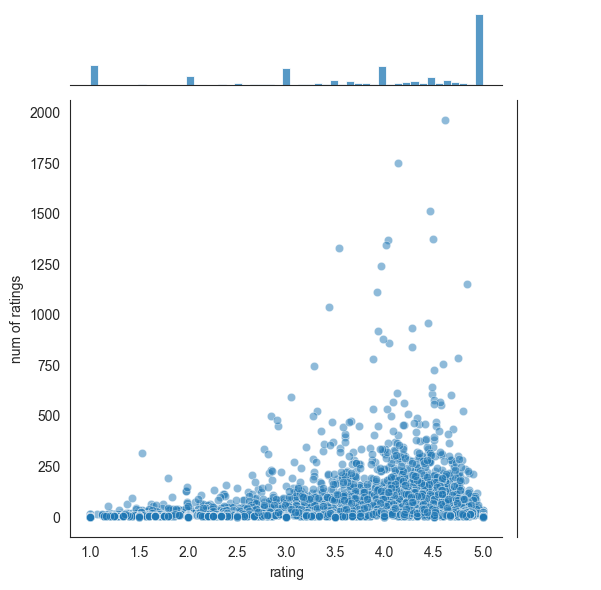

In [105]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

Con el gráfico anterior observamos una correlación fuerte entre items con más calificaciones tieneden a tener en promedio calificaciones más altas

# Muestreo 

Debido al gran tamaño de la muestra y poder de procesamiento, decidimos hacer un muestro aleatorio sobre el 20% del total de la muestra.

In [106]:
df_sample = df.sample(frac=0.2, replace=False, random_state=1234)

In [107]:
print(" El muestro aleatorio cuenta con " + str(len(df_sample)) + " registros")

 El muestro aleatorio cuenta con 140306 registros


# Sistema de Recomendación

## KNN -- Algorítmo de K Vecinos más cercanos

El algoritmo de k vecinos más cercanos, también conocido como KNN o k-NN, que utiliza la proximidad para hacer clasificaciones o predicciones sobre la agrupación de un punto de datos individual. Es decir, utiliza la medida de la distancia entre observaciones (medida por las distintas características que identifican a cada observación). 

En este caso lo utilizaremos como un sistema de recomendación que utiliza el algoritmo k-Vecinos más cercanos (KNN) para identificar aquellos artículos de compra que son similares a una a determinados artículos por su rating asigando por usuarios.

Para la construcción del sistema de recomendación a través del algorítmo de KNN es necesario construir la matris de eleementos de usuario y items. 

Esta es una matriz que es una estructura de datos básica en los sistemas de recomendación. Así es como funciona:

- Para encontrar la cantidad de usuarios únicos y videos únicos en el conjunto de datos, se calculan N y M.
- Se producen cuatro diccionarios:
    -user_mapper: asigna distintos ID de usuario a índices (el ID de usuario 1 se convierte en el índice 0, por ejemplo).
    -item_mapper: convierte distintos ID de artículos de compra en índices (el ID de item 1 se convierte en índice 0, por ejemplo).
    -user_inv_mapper: invierte user_mapper y asigna índices a ID de usuario.
    -item_inv_mapper: invierte movie_mapper asignando índices a ID de items.
- Para asignar los ID de usuario y de artículos reales en el conjunto de datos a sus índices coincidentes, se generan las listas user_index y item_index.
- Se crea una matriz X dispersa utilizando la función SciPy csr_matrix. Los índices de usuarios y artículos que corresponden a los valores de calificación en el conjunto de datos se utilizan para generar esta matriz. Su forma es (M, N), donde M denota la cantidad de distintas películas y N denota la cantidad de distintos consumidores.

Para decirlo de otra manera, este código facilita la realización de cálculos y la creación de sistemas de recomendación basados ​​en la representación estructurada de las calificaciones de los usuarios para items de compra en los datos.

In [108]:
# Now, we create user-item matrix using scipy csr matrix
#from scipy.sparse import csr_matrix

def create_matrix(df_sample):
	
	N = len(df_sample['user_id'].unique())
	M = len(df_sample['parent_asin'].unique())
	
	# Map Ids to indices
	user_mapper = dict(zip(np.unique(df_sample["user_id"]), list(range(N))))
	item_mapper = dict(zip(np.unique(df_sample["parent_asin"]), list(range(M))))
	
	# Map indices to IDs
	user_inv_mapper = dict(zip(list(range(N)), np.unique(df_sample["user_id"])))
	item_inv_mapper = dict(zip(list(range(M)), np.unique(df_sample["parent_asin"])))
	
	user_index = [user_mapper[i] for i in df_sample['user_id']]
	item_index = [item_mapper[i] for i in df_sample['parent_asin']]

	X = csr_matrix((df_sample["rating"], (item_index, user_index)), shape=(M, N))
	
	return X, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper
	
X, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper = create_matrix(df_sample)


La función toma entradas como la ID del item comprado, una matriz de elementos de usuario (X), el número de vecinos a considerar (k), una métrica de similitud (la similitud predeterminada es el coseno). La función comienza inicializando una lista en blanco para contener las identificaciones de películas que son comparables. Saca el índice de la película de destino del diccionario y utiliza la matriz de elementos de usuario para adquirir el vector de características que lo acompaña. A continuación, el modelo KNN se configura utilizando los parámetros dados.

Las distancias y los índices de los k vecinos más cercanos a cada item de compra de destino se calculan una vez que se ha ajustado el modelo KNN. Utilizando el diccionario, el bucle recupera estos índices vecinos y los asigna nuevamente a los ID de items. El código termina con una lista de artículos relacionados, sugiriendo items de compra basadas en el modelo KNN.

### Enontrar Artículos similares a X Artículo

In [109]:
"""
Find similar items using KNN
"""
def find_similar_items(item_id, X, k, metric='cosine', show_distance=False):
	
	neighbour_ids = []
	
	item_ind = item_mapper[item_id]
	item_vec = X[item_ind]
	k+=1
	kNN = NearestNeighbors(n_neighbors=k, algorithm="brute", metric=metric)
	kNN.fit(X)
	item_vec = item_vec.reshape(1,-1)
	neighbour = kNN.kneighbors(item_vec, return_distance=show_distance)
	for i in range(0,k):
		n = neighbour.item(i)
		neighbour_ids.append(item_inv_mapper[n])
	neighbour_ids.pop(0)
	return neighbour_ids

item_titles = dict(zip(df_sample['parent_asin'], df_sample['parent_asin']))

In [110]:

item_id = 'B0BM4GX6TT'

similar_ids = find_similar_items(item_id, X, k=10)
item_title = item_titles[item_id]

print(f"Since you buyed {item_title}")
for i in similar_ids:
	print(item_titles[i])


Since you buyed B0BM4GX6TT
B07NVFWKYF
B078845YCW
B088DJML9S
B00HLRS43U
B011AZLQ4C
B07CJV6HFZ
B08CRP78R8
B094FSSGWP
B07PQTCQ7D
B0792P86RW


Dado que compraste B0BM4GX6TT te podría gustar: 

- B07NVFWKYF
- B078845YCW
- B088DJML9S
- B00HLRS43U
- B011AZLQ4C
- B07CJV6HFZ
- B08CRP78R8
- B094FSSGWP
- B07PQTCQ7D
- B0792P86RW

### Encontrar árticulos que podrían gustarle a X Usuario

In [111]:
def recommend_items_for_user(user_id, X, user_mapper, item_mapper, item_inv_mapper, k=10):
	df1 = df_sample[df_sample['user_id'] == user_id]
	
	if df1.empty:
		print(f"User with ID {user_id} does not exist.")
		return

	item_id = df1[df1['rating'] == max(df1['rating'])]['parent_asin'].iloc[0]

	item_titles = dict(zip(df_sample['parent_asin'], df_sample['parent_asin']))

	similar_ids = find_similar_items(item_id, X, k)
	item_title = item_titles.get(item_id, "Item not found")

	if item_title == "Item not found":
		print(f"Item with ID {item_id} not found.")
		return

	print(f"Since you buyed {item_title}, you might also like:")
	for i in similar_ids:
		print(item_titles.get(i, "Item not found"))


In [112]:
df_sample.head()

,asin,parent_asin,user_id,rating,helpful_vote,verified_purchase
169932,B07H7C4SJK,B07H7C4SJK,AFWUQ2CT6NCFBTTNI3OCWDB3CRYQ,5.0,2,True
117265,B07T9GXWLT,B07T9GXWLT,AGI5JHRJ2PSK5BURGV762KIG2Y5A,5.0,0,True
30312,B073R5WZ4F,B073R5WZ4F,AEDSDRACFPPSWJTYBRFPMHUMHWDQ,5.0,0,True
335686,B071S98JST,B071S98JST,AEHQ7LKVLDNZOYSMFQFJU6DORK3Q,4.0,0,True
101796,B077BZCPSK,B077BZCPSK,AHTCO6WZEFV2UURBBZCLOKLSA64A,3.0,0,True


In [113]:
user_id = 'AFWUQ2CT6NCFBTTNI3OCWDB3CRYQ'
recommend_movies_for_user(user_id, X, user_mapper, movie_mapper, movie_inv_mapper, k=10)


Since you watched B07H7C4SJK, you might also like:
B081NGYJJ2
B081NBM598
B081NJ6Q6H
B081NH5KNB
B081PM5NJ3
B081MY938C
B081N2VVMP
B081PPC9TW
B081N7TZ9M
B081PKVWNP
